In [ ]:
pip install cv2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [ ]:
from google.colab.patches import cv2_imshow

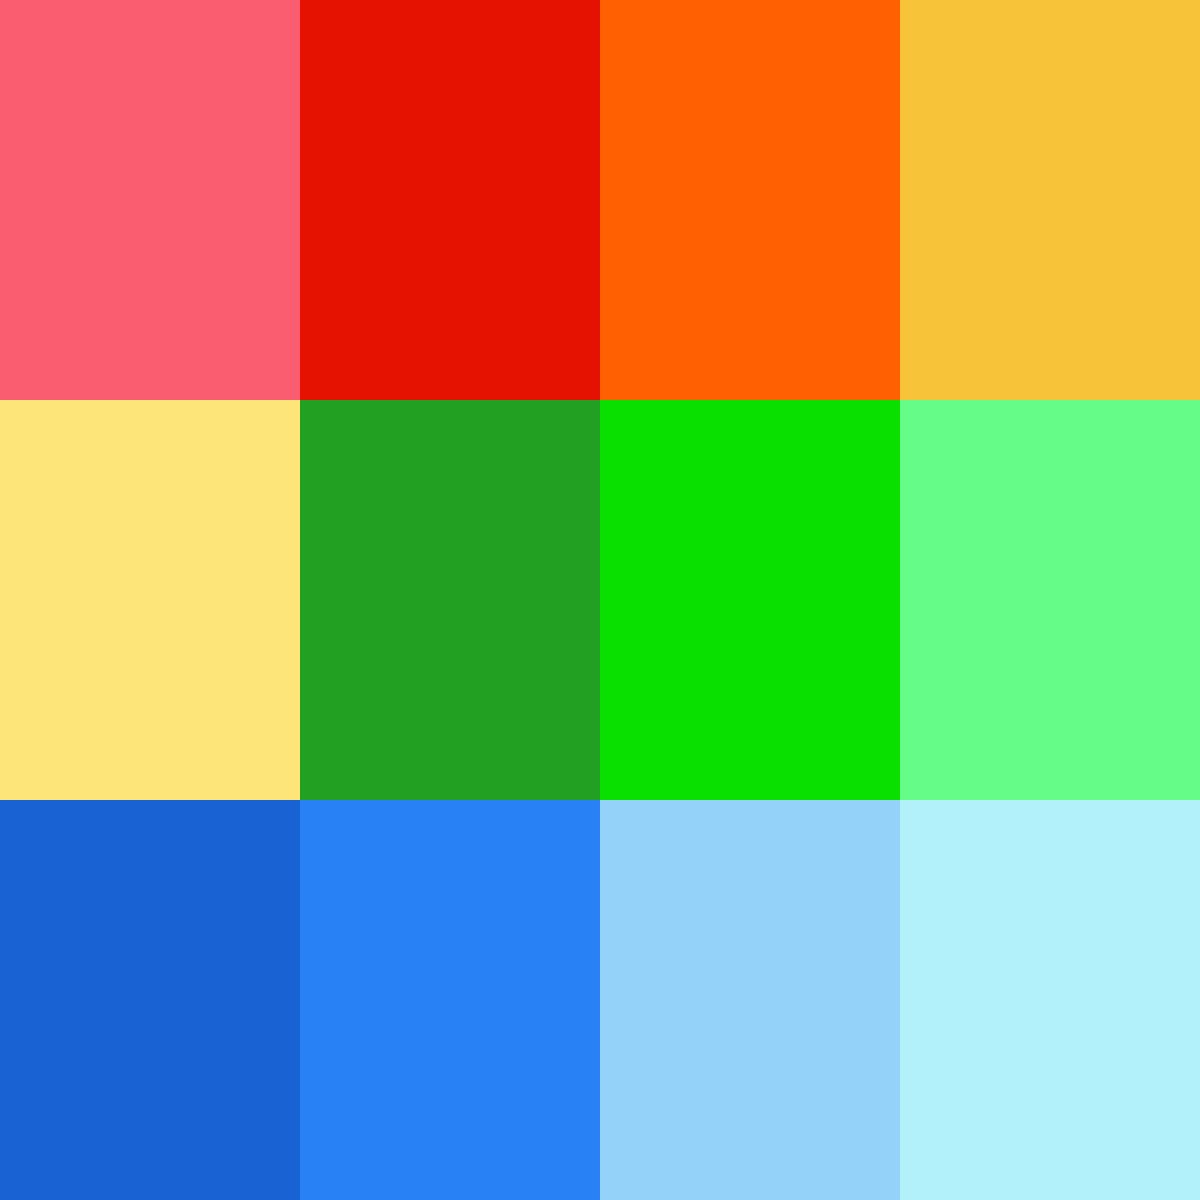

In [ ]:
img=cv2.imread('treino.jpg')
cv2_imshow(img)

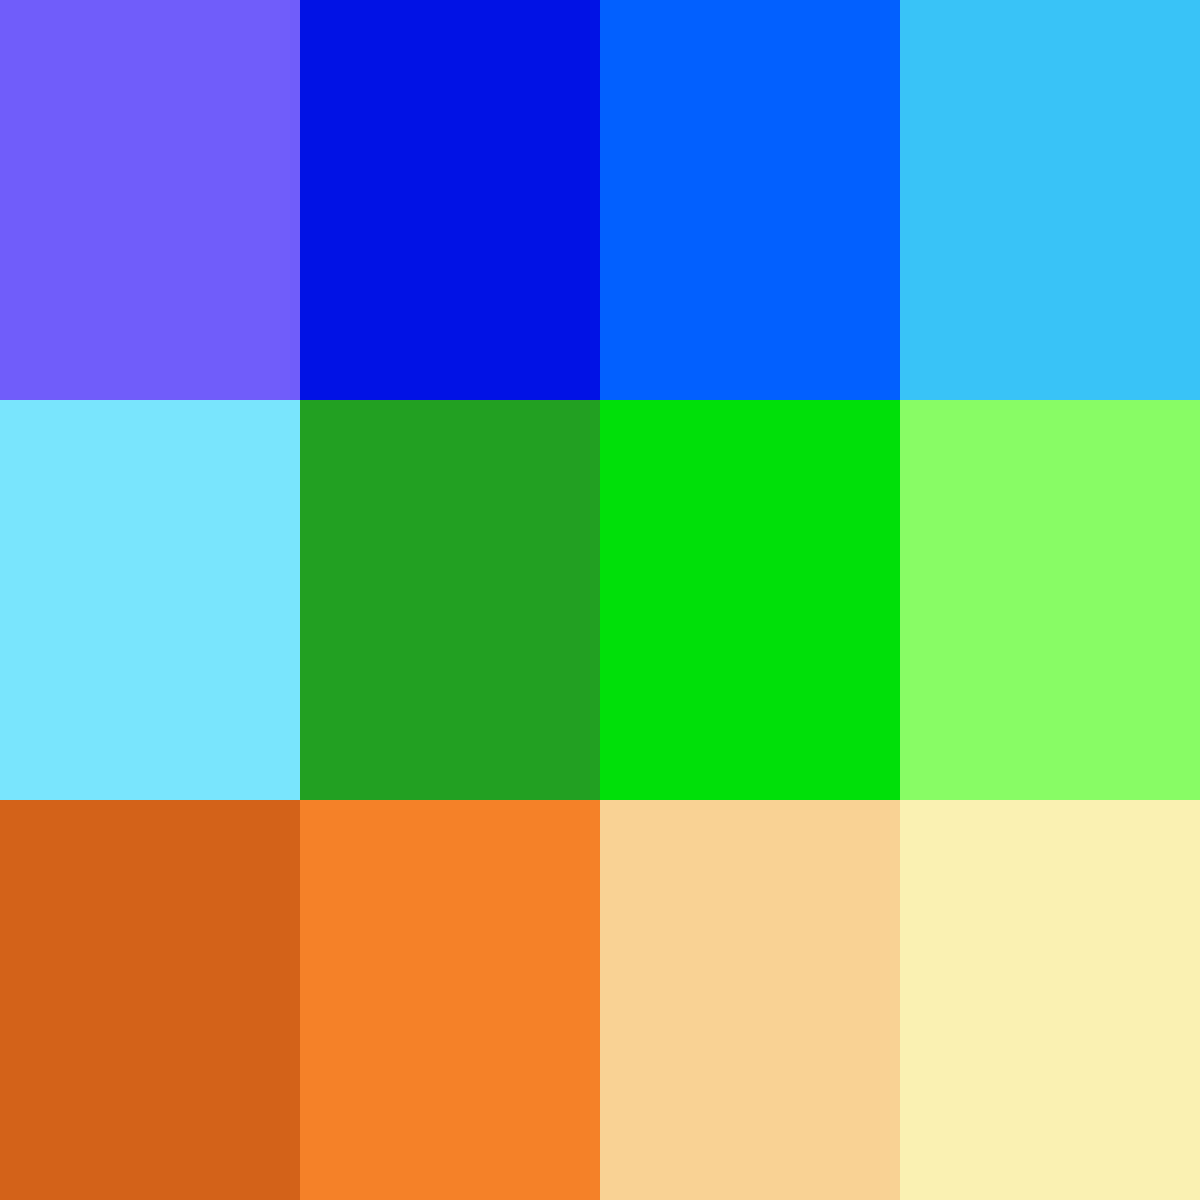

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [ ]:
img.shape[1]*img.shape[0]

1440000

In [ ]:
img=img.reshape((img.shape[1]*img.shape[0],3))
img.shape

(1440000, 3)

In [ ]:
kmeans=KMeans(n_clusters=12)
s=kmeans.fit(img)

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
s

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels=kmeans.labels_
print(labels)
labels=list(labels)

[ 6  6  6 ... 11 11 11]


In [ ]:
len(labels)

1440000

In [ ]:
centroid=kmeans.cluster_centers_
print(centroid)

[[2.47000000e+02 1.95000000e+02 5.70000000e+01]
 [4.00000000e+01 1.29000000e+02 2.45000000e+02]
 [3.40000000e+01 1.60000000e+02 3.40000000e+01]
 [1.48000000e+02 2.10000000e+02 2.49000000e+02]
 [2.29000000e+02 1.80000000e+01 1.00000000e+00]
 [1.01000000e+02 2.52000000e+02 1.36000000e+02]
 [2.50000000e+02 9.30000000e+01 1.12000000e+02]
 [2.55000000e+02 9.60000000e+01 2.00000000e+00]
 [9.00000000e+00 2.24000000e+02 1.80122584e-10]
 [2.53000000e+02 2.29000000e+02 1.21000000e+02]
 [2.50000000e+01 9.80000000e+01 2.11000000e+02]
 [1.78000000e+02 2.41000000e+02 2.50000000e+02]]


In [ ]:
type(centroid)

numpy.ndarray

In [ ]:
# centroid=[[255, 92,  108],
#           [ 223, 20, 7],
#           [ 255, 96, 0],
#           [244, 199, 54],
#           [255, 229, 118],
#           [29, 165, 29],
#           [27, 213, 15],
#           [106, 254, 128],
#           [25, 99, 212],
#           [45, 128, 236],
#           [149, 211, 252],
#           [181,  239, 251]]

In [ ]:
# centroid=np.array(centroid)
# type(centroid)

numpy.ndarray

In [ ]:
# kmeans.cluster_centers_=centroid

**Teste**

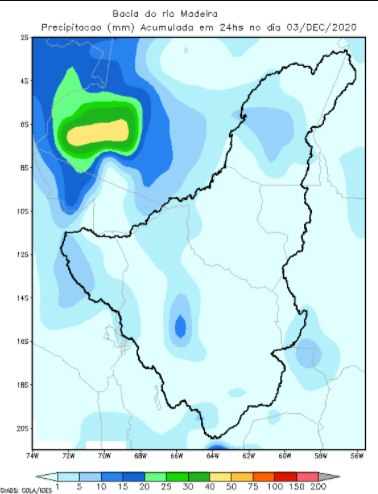

In [ ]:
img=cv2.imread('teste.jpg')
cv2_imshow(img)

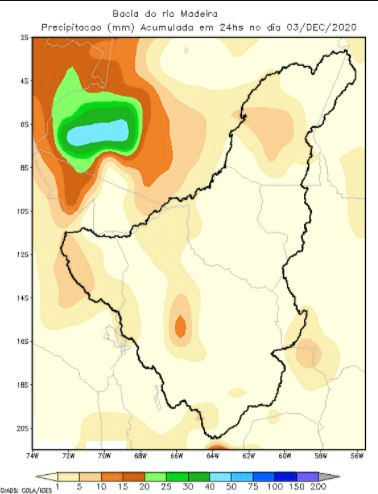

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [ ]:
img=img.reshape((img.shape[1]*img.shape[0],3))
img.shape

(186732, 3)

In [ ]:
kmeans.predict(img)
labels=kmeans.labels_
list(labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
labels=list(labels)
print(labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333]


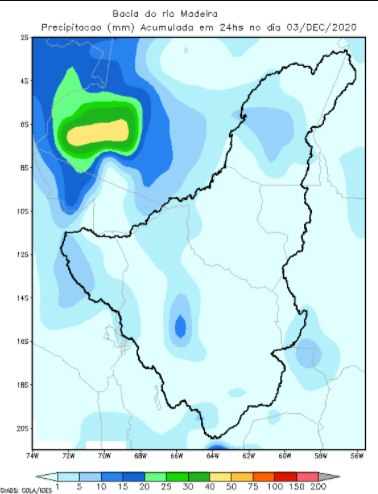

In [ ]:
# img=cv2.imread('teste.jpg')
# cv2_imshow(img)

ValueError: ignored

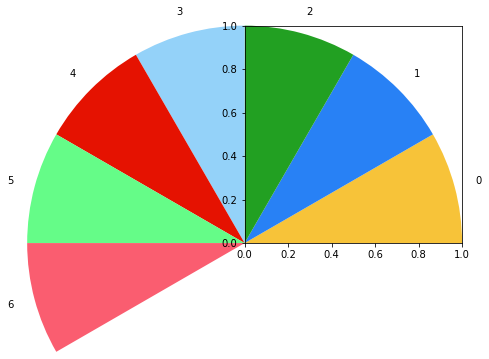

In [ ]:
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

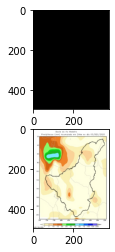

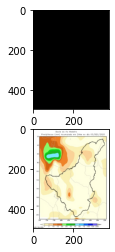

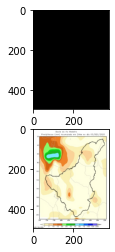

% Asfalto:  0.0
% Terra:  0.0
% Verde:  0.0


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def mostrar_inRange(img, mask):
    imask = mask > 0
    sliced = np.zeros_like(img, np.uint8)
    sliced[imask] = img[imask]
    plt.subplot(211)
    plt.imshow(sliced)
    plt.subplot(212)
    plt.imshow(img)
    plt.show()

img = cv2.imread("teste.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, imgThresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

somenteAsfalto = cv2.inRange(img, 200, 255)
somenteTerra = cv2.inRange(img, 100, 200)
somenteVerde = cv2.inRange(img, 0, 50)

pixelsAsfalto = cv2.countNonZero(somenteAsfalto)
pixelsTerra = cv2.countNonZero(somenteTerra)
pixelsVerde = cv2.countNonZero(somenteVerde)

pixelsTotal = img.size

mostrar_inRange(img, somenteAsfalto)
mostrar_inRange(img, somenteTerra)
mostrar_inRange(img, somenteVerde)

print(' % Asfalto: ', (pixelsAsfalto/pixelsTotal)*100)
print(' % Terra: ', (pixelsTerra /pixelsTotal)*100)
print(' % Verde: ', (pixelsVerde/pixelsTotal)*100)